#Projekt: Ist Julia the new kid on the block
-reinschreiben was Julia ist und wo es her kommt --> Copy paste von MIT Seite
-Vorteile von Julia

Wie ist der Status quo -> Stackoverflow Trend

Frage 1: Wie entwickelt sich der Demand
Frage 2: Wie entwickelt sich Julia im Vergleich zu Python nutzern unter Data "Leuten"
Frage 3: ???

Conclussion

Letzte Frage: Whats your opinion about Julia

In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import os
import matplotlib.ticker as mtick
df= pd.DataFrame()

In [3]:
def data_prep(df: pd.DataFrame, strYear: str) -> pd.DataFrame:
    #This function is a summary of all data preprocessing steps
    #LanguageDesireNextYear
    col_to_keep=['LanguageWorkedWith','LanguageDesireNextYear']
    
    df= rename_col_if_exists(df,'HaveWorkedLanguage','LanguageWorkedWith')
    df= rename_col_if_exists(df,'WantWorkLanguage','LanguageDesireNextYear')
    df= rename_col_if_exists(df,'tech_do','LanguageWorkedWith')
    df= rename_col_if_exists(df,'tech_want','LanguageDesireNextYear')
    df= add_year(df,strYear)
    df= classify_age(df)
    
    
    return df

def rename_col_if_exists(df: pd.DataFrame,searchCol: str,replaceCol: str) -> pd.DataFrame:
    if searchCol in df.columns:
        df.rename(columns={searchCol: replaceCol},inplace=True)
    return df

def classify_age(df: pd.DataFrame) -> pd.DataFrame:
    return df

def add_year (df: pd.DataFrame,strYear: str) -> pd.DataFrame:
    df['Year']=strYear
    return df

# LanguageDesireNextYear LanguageDesireNextYear HaveWorkedLanguage

In [4]:
dir_data= '../data'

for file in os.listdir(dir_data):
    #Load csv file and prepare data with data_prep function
    temp_df= pd.read_csv(dir_data+'/'+file)
    temp_df = data_prep(temp_df, file[0:4])
    df = df.append(temp_df)

/Users/thomaspietras/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df.head()

In [5]:
#Find the columns with Julia
df['KnowsJulia']=df['LanguageWorkedWith'].str.contains('Julia',regex=False)

In [ ]:
df['KnowsJulia'].value_counts()

In [6]:
df['WantsJulia']=df['LanguageDesireNextYear'].str.contains('Julia',regex=False)

In [ ]:
df['WantsJulia'].value_counts()

In [ ]:
df.groupby(by='Year').count()

In [ ]:
df_group=df.groupby(by=['Year','WantsJulia'],dropna=False)['WantsJulia'].count()/df.groupby(by=['Year'],dropna=False)['WantsJulia'].count()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['WantsJulia'].isna().value_counts()

In [13]:
df_group=df[~df.WantsJulia.isna() & df.WantsJulia].groupby(by=['Year','WantsJulia'],dropna=False)['WantsJulia'].count()/df.groupby(by=['Year'],dropna=False)['WantsJulia'].count()

In [15]:
import matplotlib.ticker as mtick

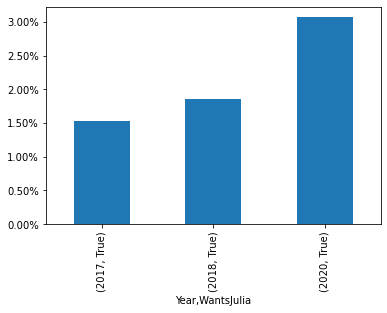

In [28]:
import matplotlib.pyplot as plt
ax=df_group.plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.savefig(fname='Pictures/WantsJulia.png')

In [21]:
plt.savefig()

AttributeError: 'AxesSubplot' object has no attribute 'savefig'